# Comparison of interpolation methods
We compare the results of our interpolation method versus reproject to verify the results.

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import time
from dfreproject import calculate_reprojection
from reproject import reproject_interp
from demo.create_test_data import create_test_fits_tiny
from matplotlib import pyplot as plt
import cmcrameri.cm as cmc
import numpy as np

In [2]:
source_file, target_file = create_test_fits_tiny()
source_hdu = fits.open(source_file)[0]
target_hdu = fits.open(target_file)[0]

In [6]:
start = time.time()
reprojected_source_torch = calculate_reprojection(source_hdu, WCS(target_hdu.header), shape_out=target_hdu.data.shape, order="nearest")
print(f"total time: {time.time()-start}")

total time: 0.023960113525390625


In [9]:
start = time.time()
reprojected_source_reproj = reproject_interp(source_hdu, target_hdu.header,order='nearest-neighbor')[0]
#reprojected_source_reproj = reproject_interp(target_hdu, source_hdu.header,order='bicubic')[0]
print(f"total time: {time.time()-start}")

total time: 0.014254331588745117


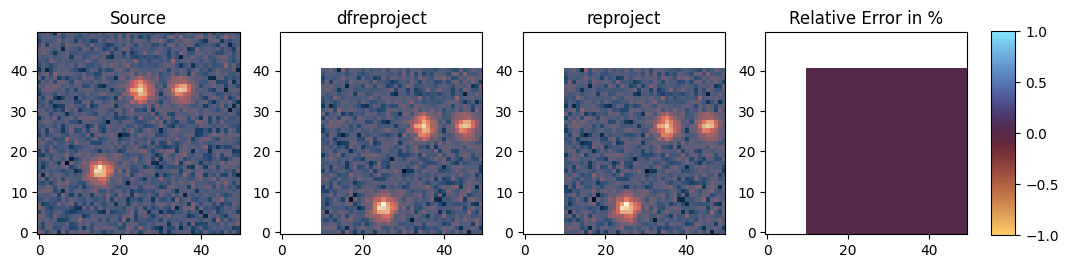

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(12,6))
axs[0].imshow(source_hdu.data, origin='lower', cmap=cmc.lipari)
axs[0].set_title('Source')

im1 = axs[1].imshow(reprojected_source_torch, origin='lower', cmap=cmc.lipari)
axs[1].set_title("dfreproject")

im2 = axs[2].imshow(reprojected_source_reproj, origin='lower', cmap=cmc.lipari)
axs[2].set_title("reproject")

diff_result = 100*(reprojected_source_torch.astype(np.float32)- reprojected_source_reproj.astype(np.float32))/reprojected_source_reproj.astype(np.float32)
im3 = axs[3].imshow(diff_result, origin='lower', cmap=cmc.managua, vmin=-1, vmax=1)
axs[3].set_title("Relative Error in %")

# Adjust the layout to make room for the colorbar
#fig.tight_layout()
# Add colorbar in a way that doesn't resize the last panel
cbar_ax = fig.add_axes([0.92, 0.325, 0.02, 0.34])  # [left, bottom, width, height]
fig.colorbar(im3, cax=cbar_ax)

plt.savefig('./comparison.png', dpi=300)

As we can see the results are extremely similar. The differences are due to how the normalization is handled in our implementation versus reproject_interp.